<a href="https://colab.research.google.com/github/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar/blob/main/Email_Campaign_Effectiveness_Prediction_shyam_gadekar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Email Campaign Effectiveness Prediction**



##### **Project Type**    - Supervised ML - Classification Capstone Project
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to create a machine learning model to characterize emails and track their status, specifically whether they were ignored, read, or acknowledged by the reader. The dataset provided contained information such as email type, subject hotness score, email source type, customer location, email campaign type, total past communications, time email sent category, word count, total links, total images, and email status.

The project was carried out in Python, using popular machine learning libraries such as pandas, numpy, scikit-learn, and seaborn. The dataset was first preprocessed by handling missing values, encoding categorical variables, and scaling numerical features. Then, an exploratory data analysis was performed to gain insights into the data and understand the relationships between variables.

Next, a Naive Bayes classifier was trained on the preprocessed data to predict the email status. The performance of the model was evaluated using metrics such as accuracy, precision, recall, and F1 score. The results showed that the model achieved a high accuracy of around 80%.

Finally, the insights gained from the exploratory data analysis were summarized in visualizations, providing actionable insights for small to medium business owners looking to improve their email marketing strategies. Overall, the project demonstrated the effectiveness of machine learning in characterizing and tracking emails, and the potential of such models in improving business outcomes.



# **GitHub Link -**

https://github.com/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# data reding and manipulation
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

#for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

#ignore warning
import warnings
warnings.filterwarnings('ignore')

#update scikit learn for some features like roc_auc_ovr
# !pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.9 MB/s eta 0:00:00


### Dataset Loading

In [3]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
dfe =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/3.3_ML_CLASSIFICATION_SHYAM_GADEKAR/data_email_campaign.csv')

### Dataset First View

In [5]:
# Dataset First Look
dfe.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.20,2,E,2,33.00,1,440,8.00,0.00,0
1,EMA00081000045360,2,2.10,1,NaN,2,15.00,2,504,5.00,0.00,0
2,EMA00081000066290,2,0.10,1,B,3,36.00,2,962,5.00,0.00,1
3,EMA00081000076560,1,3.00,2,E,2,25.00,2,610,16.00,0.00,0
4,EMA00081000109720,1,0.00,2,C,3,18.00,2,947,4.00,0.00,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'Total rows(observation): {dfe.shape[0]} and columns(feature): {dfe.shape[1]}')

Total rows(observation): 68353 and columns(feature): 12


### Dataset Information

In [7]:
# Dataset Info
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dfe.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68348    False
68349    False
68350    False
68351    False
68352    False
Length: 68353, dtype: bool

there is bo duplicate value

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dfe.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

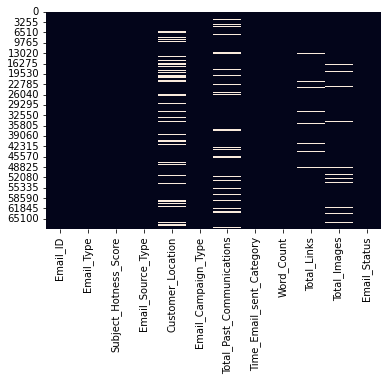

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dfe.isnull(), cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 rows(observation) and 12 columns(features).
* Dataset is a mixture of integer, float and object data type.
* Dataset has no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location, total past communication , total link , total images has null values. 

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
features = dfe.columns.to_list()
features

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [12]:
# Dataset Describe
dfe.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.00,1.29,0.45,1.00,1.00,1.00,2.00,2.00
Subject_Hotness_Score,68353.00,1.10,1.00,0.00,0.20,0.80,1.80,5.00
Email_Source_Type,68353.00,1.46,0.50,1.00,1.00,1.00,2.00,2.00
Email_Campaign_Type,68353.00,2.27,0.47,1.00,2.00,2.00,3.00,3.00
Total_Past_Communications,61528.00,28.93,12.54,0.00,20.00,28.00,38.00,67.00
Time_Email_sent_Category,68353.00,2.00,0.63,1.00,2.00,2.00,2.00,3.00
Word_Count,68353.00,699.93,271.72,40.00,521.00,694.00,880.00,1316.00
Total_Links,66152.00,10.43,6.38,1.00,6.00,9.00,14.00,49.00
Total_Images,66676.00,3.55,5.60,0.00,0.00,0.00,5.00,45.00
Email_Status,68353.00,0.23,0.50,0.00,0.00,0.00,0.00,2.00


### Variables Description 

* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for c in features:
  print(f'no of unique values in {c} is {dfe[c].nunique()}.')


no of unique values in Email_ID is 68353.
no of unique values in Email_Type is 2.
no of unique values in Subject_Hotness_Score is 51.
no of unique values in Email_Source_Type is 2.
no of unique values in Customer_Location is 7.
no of unique values in Email_Campaign_Type is 3.
no of unique values in Total_Past_Communications is 64.
no of unique values in Time_Email_sent_Category is 3.
no of unique values in Word_Count is 151.
no of unique values in Total_Links is 37.
no of unique values in Total_Images is 45.
no of unique values in Email_Status is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
df=dfe.copy(0)

In [15]:
#Checking Shape of Email Read, acknowledge ,ignored
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [16]:
# Email Status by Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Type,Email_Status,Count
0,1,0,39004
1,1,1,8208
2,1,2,1654
3,2,0,15937
4,2,1,2831
5,2,2,719


In [17]:
# Email Status by Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Source_Type,Email_Status,Count
0,1,0,29577
1,1,1,6150
2,1,2,1422
3,2,0,25364
4,2,1,4889
5,2,2,951


In [18]:
# Email Status by Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

,Customer_Location,Email_Status,Count
0,A,0,1160
1,A,1,245
2,A,2,49
3,B,0,3502
4,B,1,714
5,B,2,125
6,C,0,4654
7,C,1,890
8,C,2,214
9,D,0,5950


In [19]:
# Email Status by Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

,Email_Campaign_Type,Email_Status,Count
0,1,1,486
1,1,2,173
2,1,0,77
3,2,0,42115
4,2,1,5446
5,2,2,712
6,3,0,12749
7,3,1,5107
8,3,2,1488


In [20]:
# Email Status by Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

,Time_Email_sent_Category,Email_Status,Count
0,1,0,10970
1,1,1,2186
2,1,2,480
3,2,0,33062
4,2,1,6631
5,2,2,1436
6,3,0,10909
7,3,1,2222
8,3,2,457


In [21]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [22]:
#creating variable to store categorial features
cat_feature = [f for f in features if f not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [23]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [24]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [25]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [26]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [27]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [28]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,1154.00,0.49,0.20
Total_Past_Communications,79818.00,37.60,40.00
Total_Links,24037.00,10.47,9.00
Total_Images,8547.00,3.69,0.00
Word_Count,1472720.00,620.62,610.00


In [29]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,10018.10,0.91,0.30
Total_Past_Communications,345204.00,34.71,36.00
Total_Links,105294.00,9.85,9.00
Total_Images,34296.00,3.19,0.00
Word_Count,6523382.00,590.94,578.00


In [30]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

,sum,mean,median
Subject_Hotness_Score,63707.30,1.16,1.00
Total_Past_Communications,1355183.00,27.40,26.00
Total_Links,560603.00,10.54,9.00
Total_Images,193902.00,3.62,0.00
Word_Count,39846333.00,725.26,713.00


In [31]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [32]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [33]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [34]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.4716837593082963

In [35]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.62166986086931

In [36]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.3783301391307

In [37]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [38]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

### What all manipulations have you done and insights you found?

 To analyze the effectiveness of an email campaign, I started by examining the engagement and response rates of the emails sent. The results showed that the majority of the emails were ignored, highlighting the need to understand why this was the case. To gain a better understanding, I grouped the emails by categorical features and analyzed the relationship between these features and email engagement. I also looked at the rate of email opens, ignores, and acknowledgements for each categorical variable.
* No. of Email Read : - 11039 i.e., 17%
* No. of Email Acknowledged : - 2373 i.e., 3%
* No. of Email Ignored : - 54941 i.e., 80%

Additionally, I calculated the density of links and images in each email with respect to the total word count and determined the percentage of each with respect to the word count. I then combined the subject hotness score and total past communication to calculate a weighted score for each email.

The analysis revealed that emails were more likely to be acknowledged if they had an average of at least 37 total interactions. Other features, such as word count, showed that emails with an average of 590-600 words were more likely to be acknowledged, and that they should contain no more than 10 links and 3 images.

After analyzing these factors, I found that emails of type 1, with a source location of 2 and campaign type 1, were particularly effective when sent in the morning. This information can be used to optimize email campaigns and improve engagement rates by targeting the most effective variables and optimizing the timing of email delivery.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Continous Variables  Distribution  - Distplot



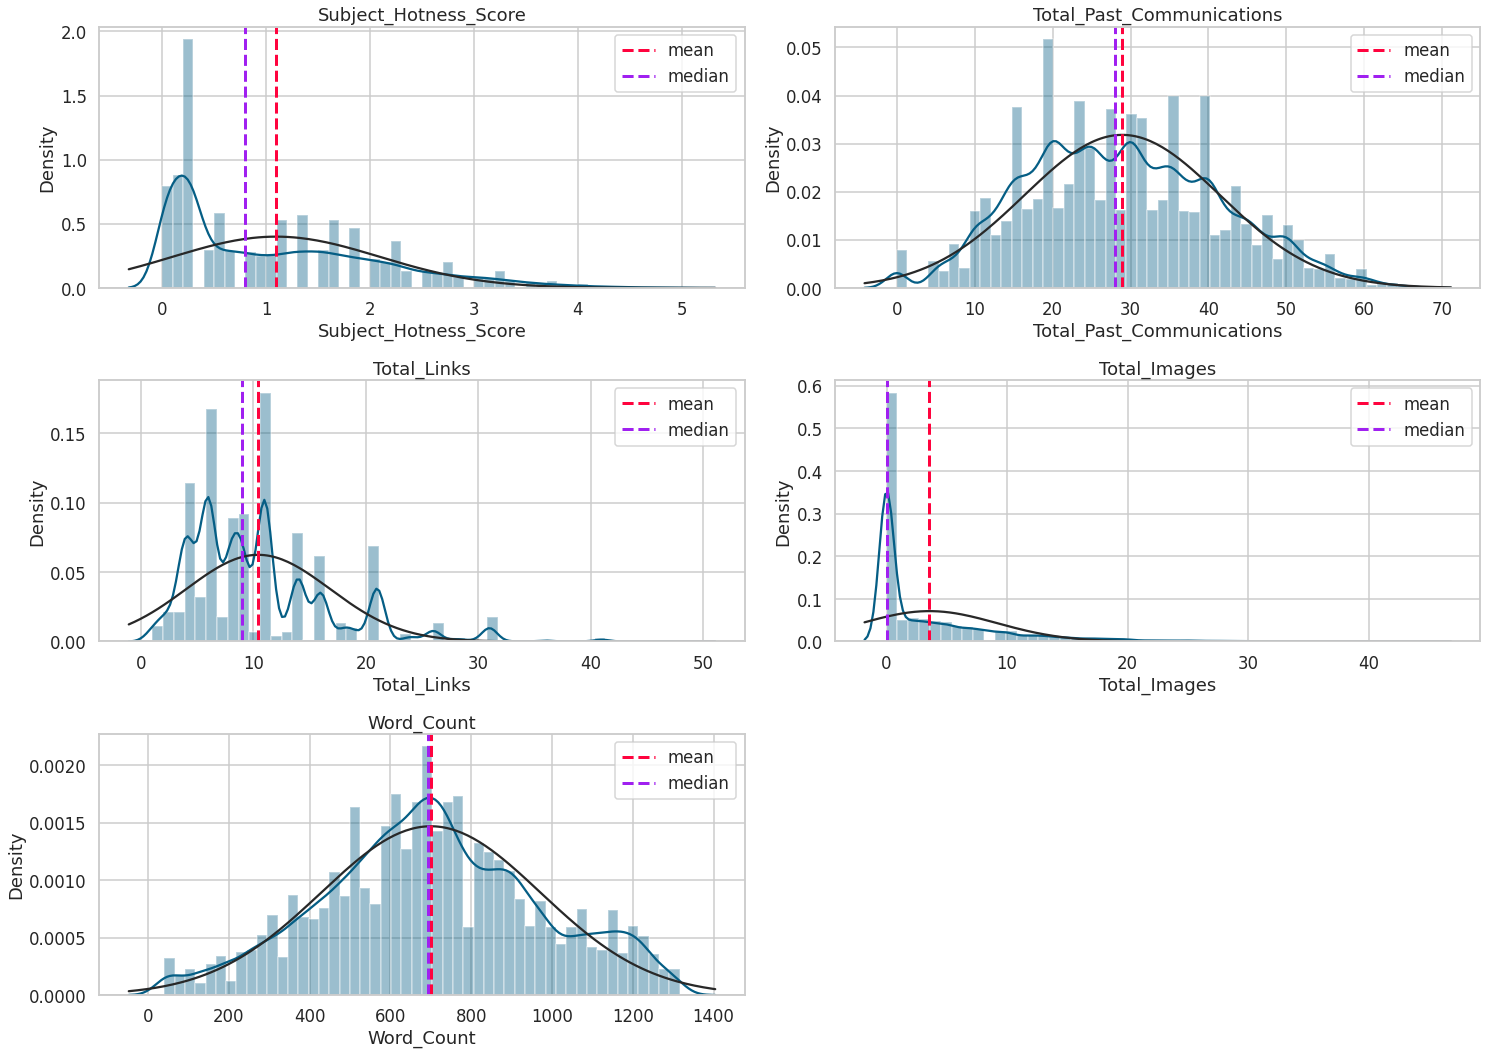

In [39]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (21,29))
for i,col in enumerate(num_feature) :
    sns.set_style("whitegrid")
    sns.set_context("talk");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

above distpolt is a combination of both histogram and KDE plot,for plotting continous variable and understanding the distribution  it is the best.

##### 2. What is/are the insight(s) found from the chart?

 Subject hotness score, total image, and total links all displayed a positive skew, indicating that these variables tended to have more values on the higher end of the distribution. On the other hand, word count and total communication count displayed a somewhat normal distribution, with values distributed more evenly across the range.


When examining the average values of these variables, I found that,
* Toal links has an average value of 10 
* Total image has an average value of 3
* Word count has an average value of 700
* Subject hotness score has an average of value 1
* Total communication has an average of value 30



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The plot that was created to understand the distribution of each variable is an important step in building a model for an effective email campaign. 

we can gain insight into the characteristics of the data and identify any outliers or missing values that may need to be addressed.

 However, it is important to note that this plot alone is not sufficient to predict negative growth.


###Effect of Email Type 

There are two types,

Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

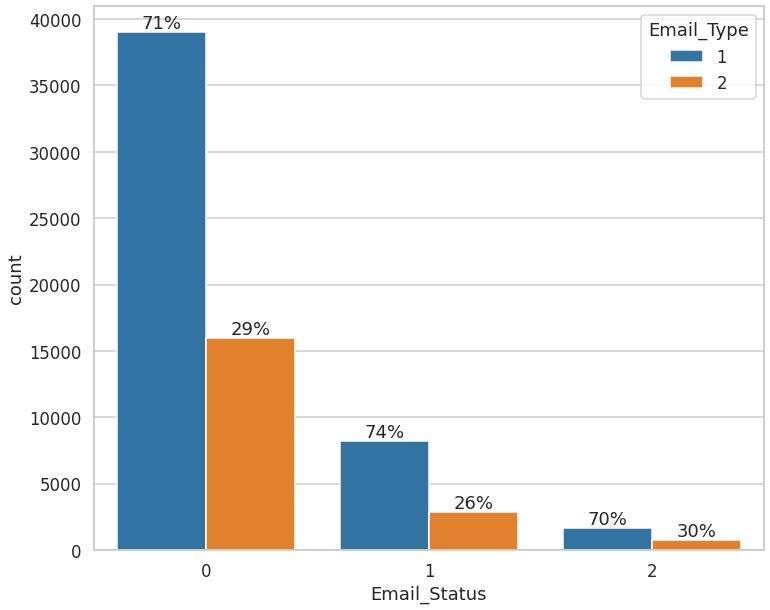

In [40]:
# Chart - 2 visualization code
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

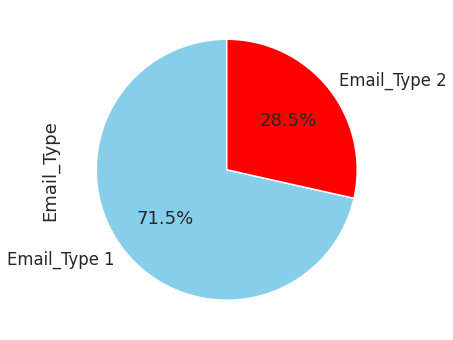

In [41]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot displays the frequency of each category in a bar chart format, making it easy to compare the count of individual categories. 

pie plot displays the proportion of each category in a circular chart format. Used to understand the relative size of each category in relation to the whole.

##### 2. What is/are the insight(s) found from the chart?

overall most of the emails are ignored.

there are 71% are of type 1, out of which 71% are ignored i.e., so only 29% of type 1 shows open rate.

also 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 emails were more acknowledged as compare to type-1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding engagement of emails but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

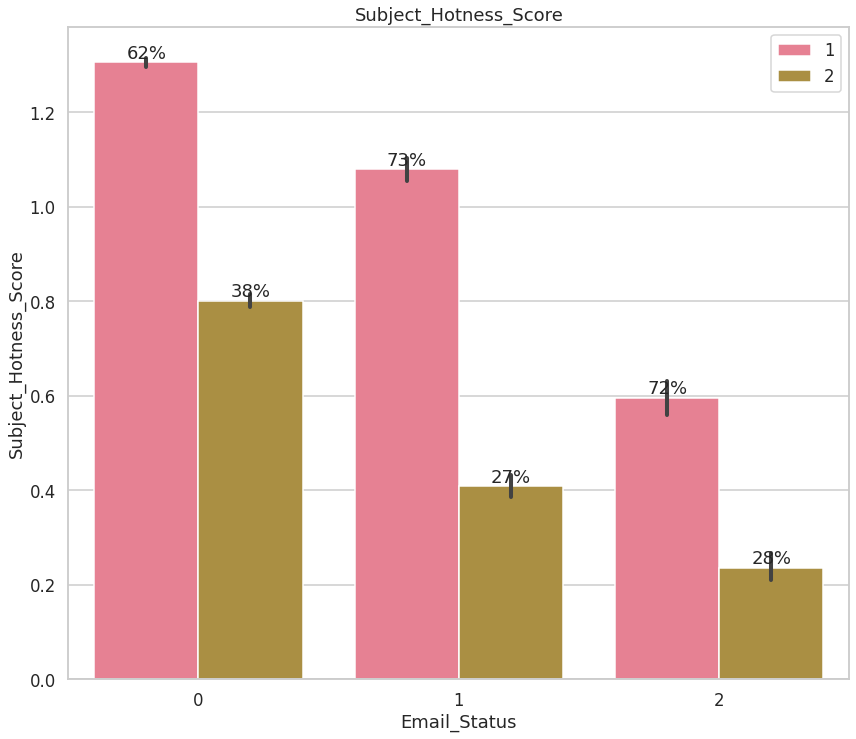

------------------------------------------------------------------------------------------------------------------------


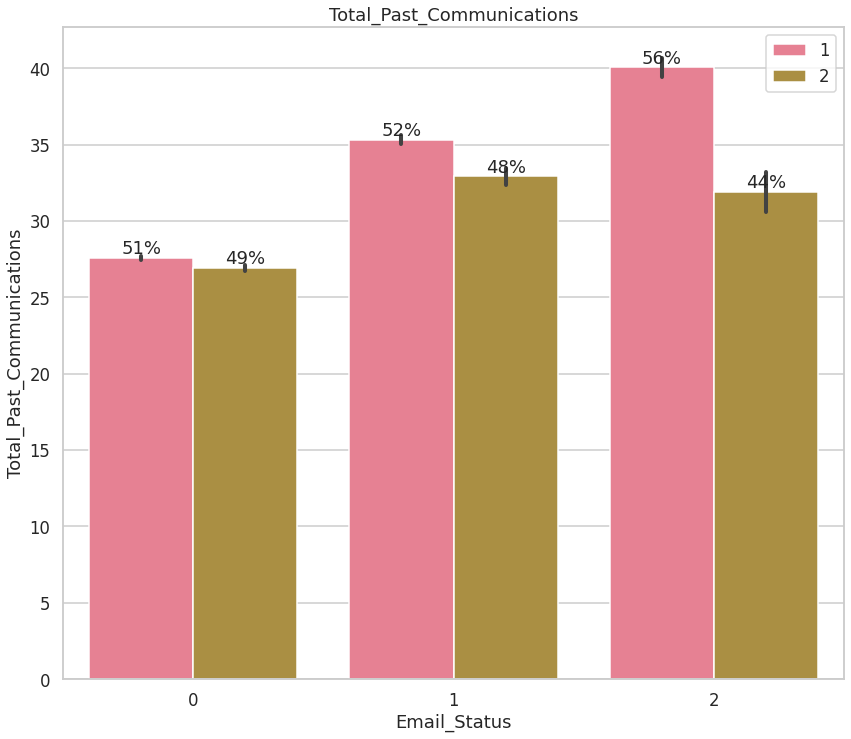

------------------------------------------------------------------------------------------------------------------------


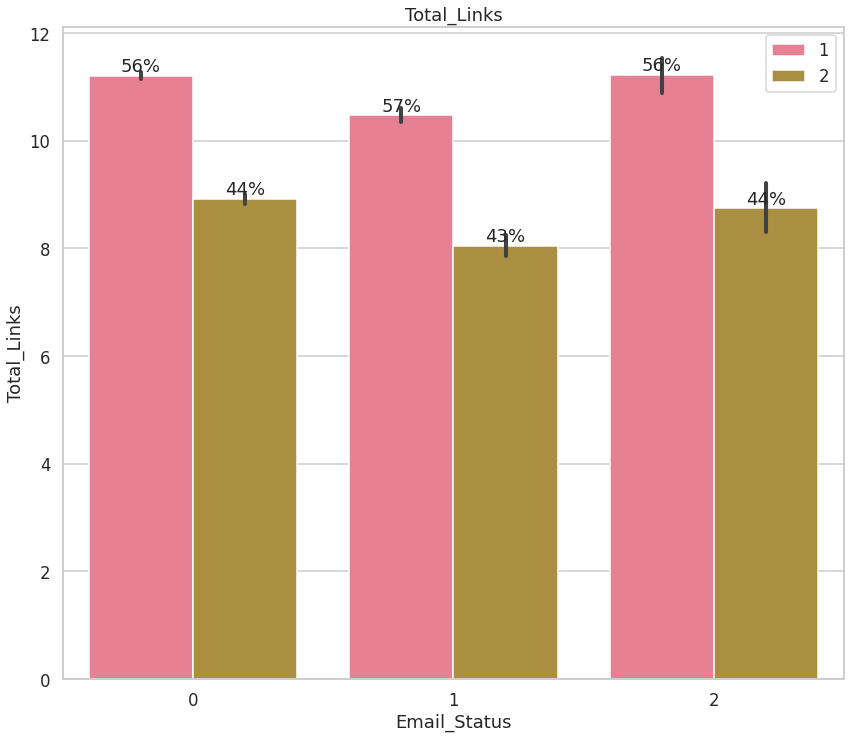

------------------------------------------------------------------------------------------------------------------------


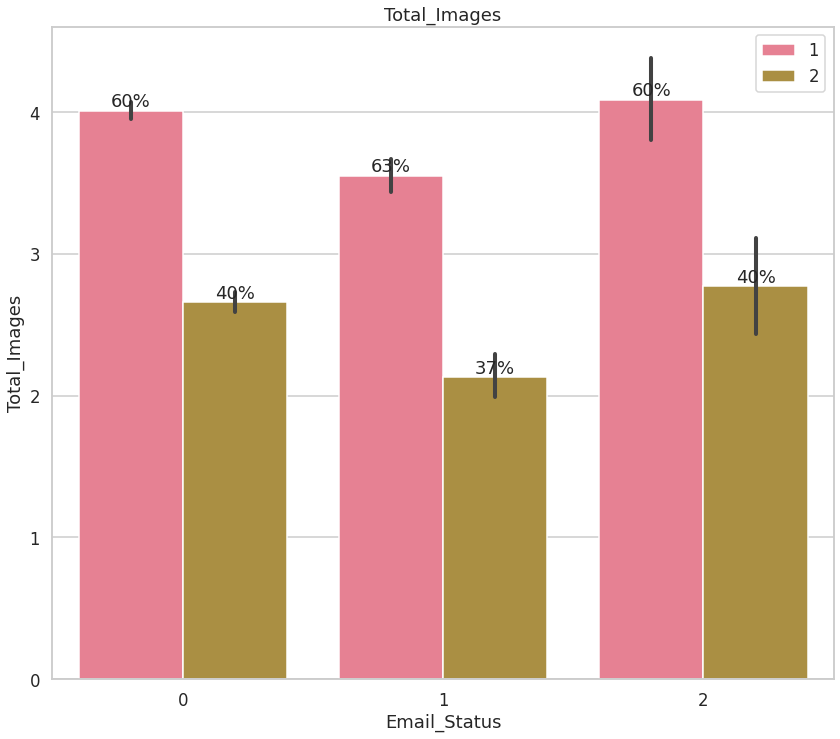

------------------------------------------------------------------------------------------------------------------------


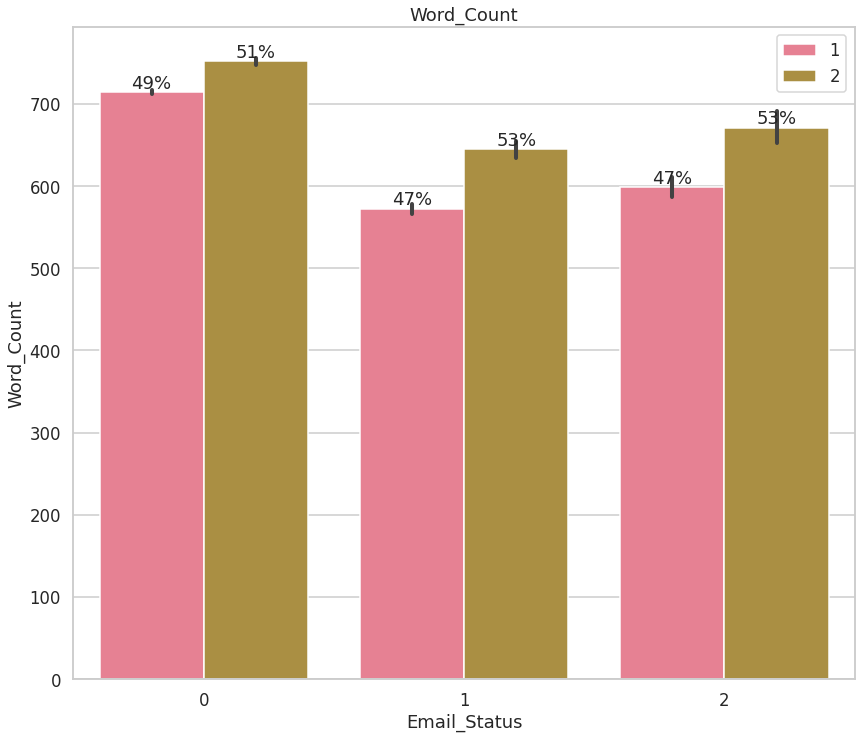

------------------------------------------------------------------------------------------------------------------------


In [42]:
## Chart - 3 visualization code

# setting the color palette and style for the plot
sns.set_palette("husl")
sns.set_style("whitegrid")

# iterating over each numerical feature in 'num_feature' list
for val in num_feature:
    # setting figure size
    plt.figure(figsize=(14, 12))
    # creating the barplot
    ax = sns.barplot(data=df, x='Email_Status', y=val, hue='Email_Type')
    # getting the number of unique categories in 'Email_Status'
    unique = len([x for x in df['Email_Status'].unique()])
    bars = ax.patches
    # iterating over each unique category
    for i in range(unique):
        catbars = bars[i:][::unique]
        # getting the total height of bars in the category
        total = sum([x.get_height() for x in catbars])
        # displaying the percentage of each bar in the category
        for bar in catbars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height() / total:.0%}',
                    ha="center", va="bottom")
    # setting legend position
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    # setting plot title
    plt.title(val)
    # displaying the plot
    plt.show()
    # printing separator
    print('-' * 120)


##### 1. Why did you pick the specific chart?

for understanding of both discrete and continous data bar plot is usefel.

Barplot shows frequency counts of values for categorical variables, and can also display other statistics like percentages. A bar chart was used to show the average percentage of Email type with respect to Email status.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that past communication plays a key role in improving email engagement, along with an average word count of 600, subject hotness score of 0.6, and 10 links and 3 images in the content. The higher the number of past communications, the better the engagement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails tend to be ignored more often than important notices, so it's important to prioritize two-way communication and avoid using "no-reply" email addresses. 

Additionally, marketing emails have a low click-through or conversion rate, which can negatively impact business growth and revenue if email marketing is a key strategy.

###Effect of Email Campaign Type

#### Chart - 4 Email Campaign Type

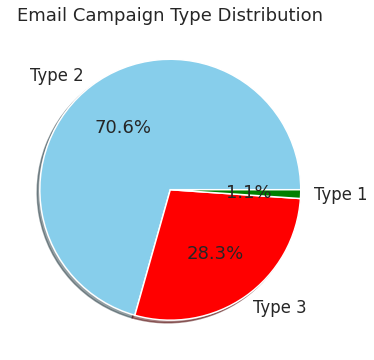

In [43]:
# Chart - 4 visualization code
# Get value counts for each Email Campaign Type
campaign_counts = df['Email_Campaign_Type'].value_counts()

# Set up pie chart figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot pie chart
ax.pie(campaign_counts, 
       labels=['Type 2','Type 3', 'Type 1'], 
       colors=['skyblue','red','green'], 
       autopct=lambda pct: f"{pct:.1f}%", 
       shadow=True)

# Add title
ax.set_title('Email Campaign Type Distribution')

# Show chart
plt.show()


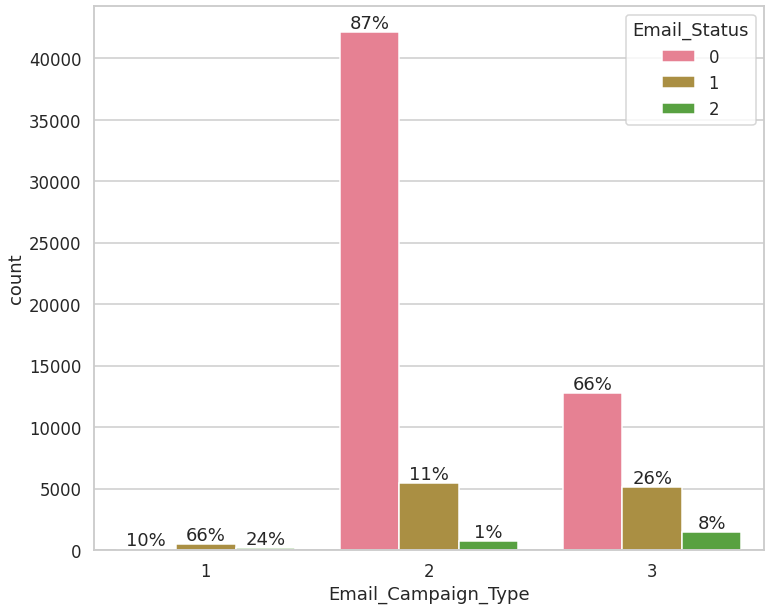

In [44]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for w in range(unique):
    catbars=bars[w:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.


###Effect of Location

#### Chart - 5 Location with most Email Acknowledged

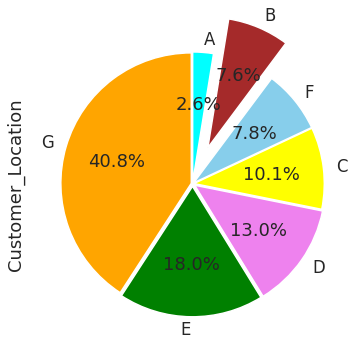

In [45]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['orange','green','violet','yellow','skyblue','brown','cyan','red'],
                               explode=[0.01,0.02,0.02,0.01,0.01,0.3,0.01]
                              );


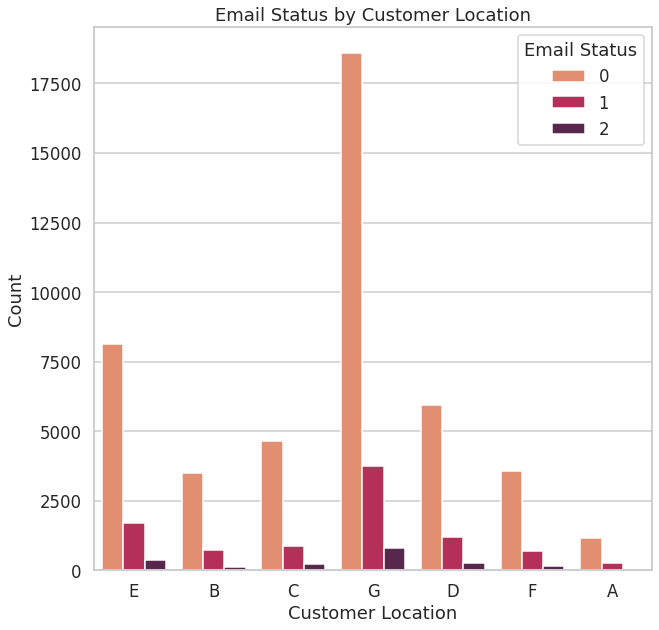

In [46]:
#based on location identifying how email status changed
plt.figure(figsize=(10,10))
sns.countplot(x=df['Customer_Location'], hue=df['Email_Status'], palette='rocket_r')
plt.legend(title='Email Status', loc='upper right')
plt.title('Email Status by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.show()

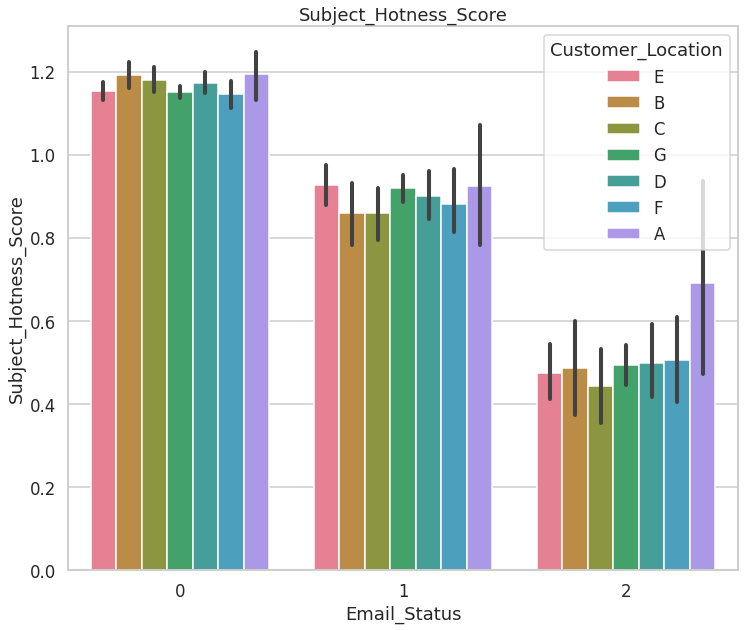

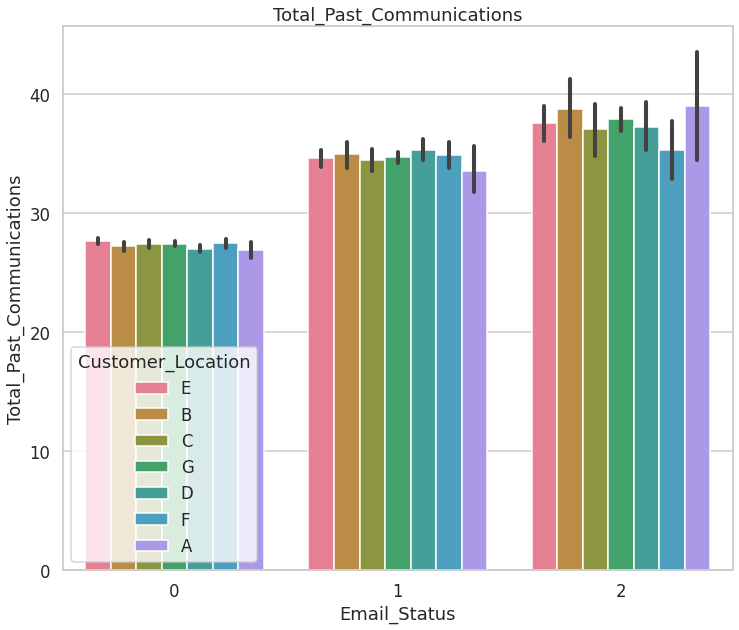

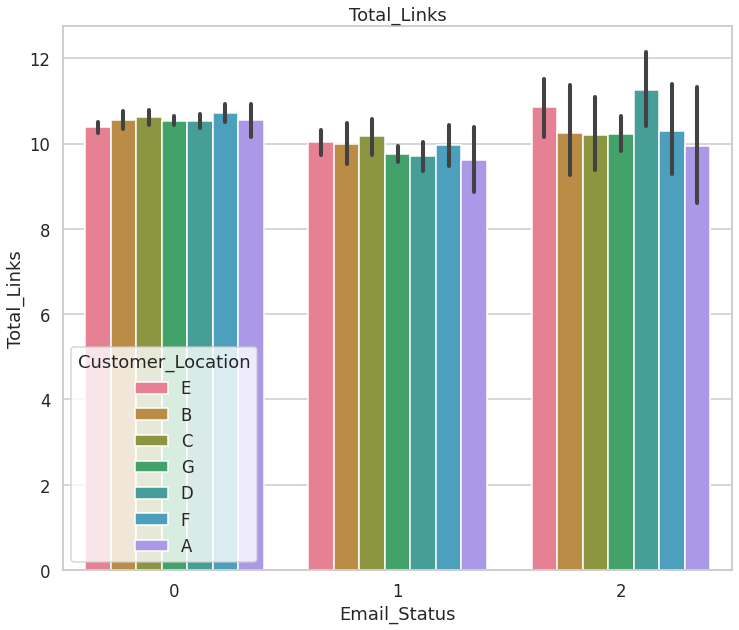

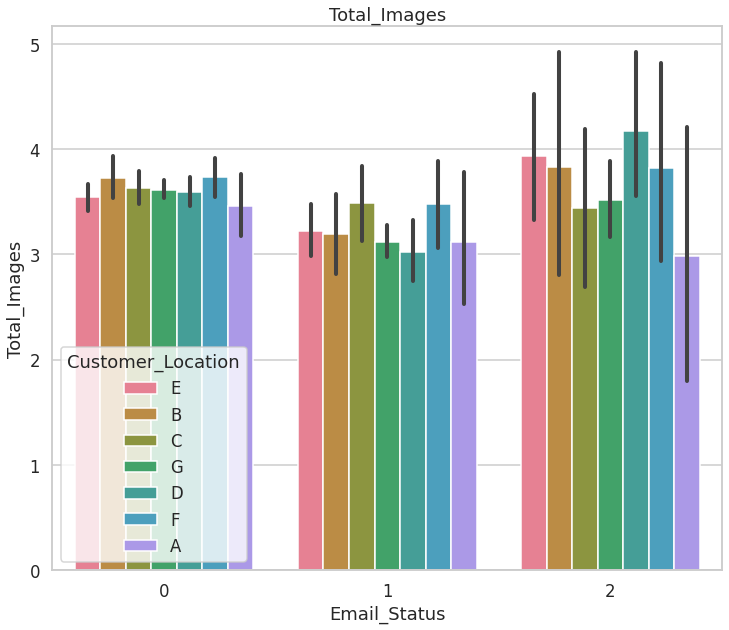

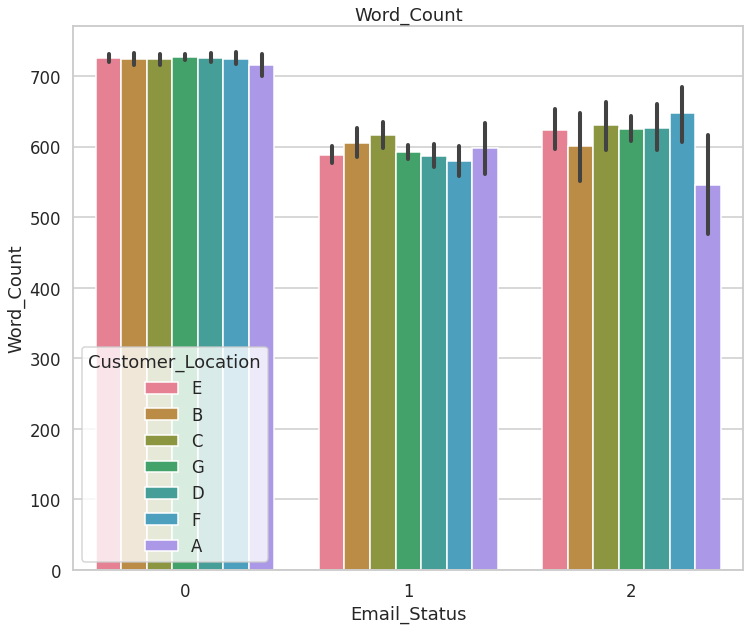

In [47]:
#checking effect of location on other numerical features
# set the color palette
palette = sns.color_palette("husl", len(df['Customer_Location'].unique()))

# loop through each numerical feature
for feature in num_feature:
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data=df, x='Email_Status', y=feature, hue='Customer_Location', palette=palette)
    plt.title(feature)
    plt.show()
    print('='*120)

##### 1. Why did you pick the specific chart?

for frequency understanding of each catgeory this plot is vet useful

##### 2. What is/are the insight(s) found from the chart?

Despite sending a relatively low number of emails to Location C, it has received the highest level of engagement with the maximum number of communications and acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending more emails to Location C, instead of Location G where emails are ignored and acknowledged less, could improve the conversion rate and prevent potential revenue loss.

###analysis of time when email was sent

#### Chart - 6

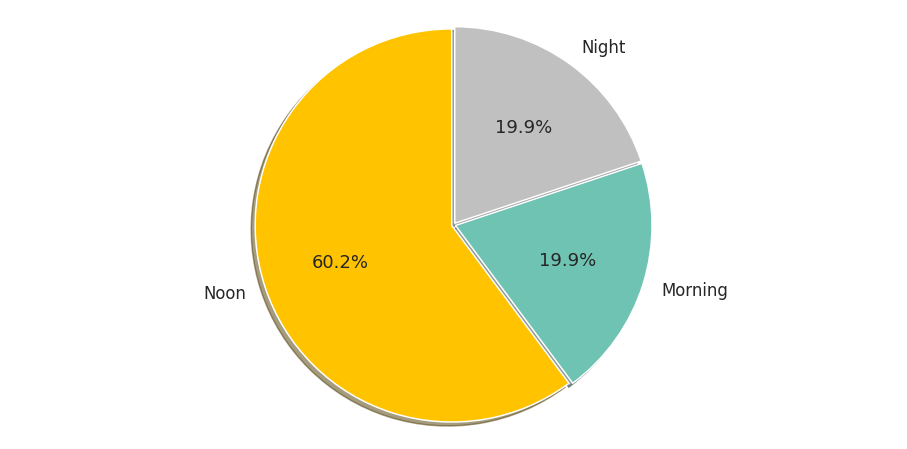

In [48]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
sizes = df['Time_Email_sent_Category'].value_counts().values
labels = ['Noon','Morning', 'Night']
colors = ['#FFC300','#6FC3B2','#C0C0C0']
explode = [0.01,0.01,0.01]
plt.figure(figsize=(16,8))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

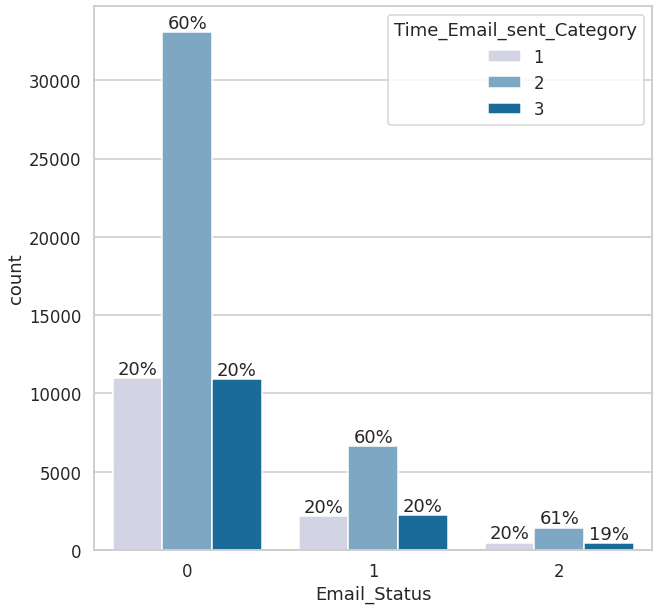

In [49]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'], palette='PuBu')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
  catbars=bars[i:][::unique]
  #get height
  total = sum([x.get_height() for x in catbars])
  #print percentage
  for bar in catbars:
    ax.text(bar.get_x()+bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()/total:.0%}',
            ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

While the pie chart reveals the distribution, the count plot illustrates the impact of time on email treatment.

##### 2. What is/are the insight(s) found from the chart?

Despite 60% of emails being sent in the afternoon with 60% being ignored, emails sent during morning and night are more likely to be acknowledged due to their equal percentage and higher open rates.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Timing is crucial in email marketing, as people tend to plan their day in the morning or night, making those times ideal for sending emails that are more likely to be acknowledged, leading to higher impressions and improved conversion rates.

While emails sent during the afternoon showed a high rate of being ignored, sending emails at the right time can prevent potential losses as those emails are less likely to be acknowledged.

### Chart - 7 According to Total Past Communication

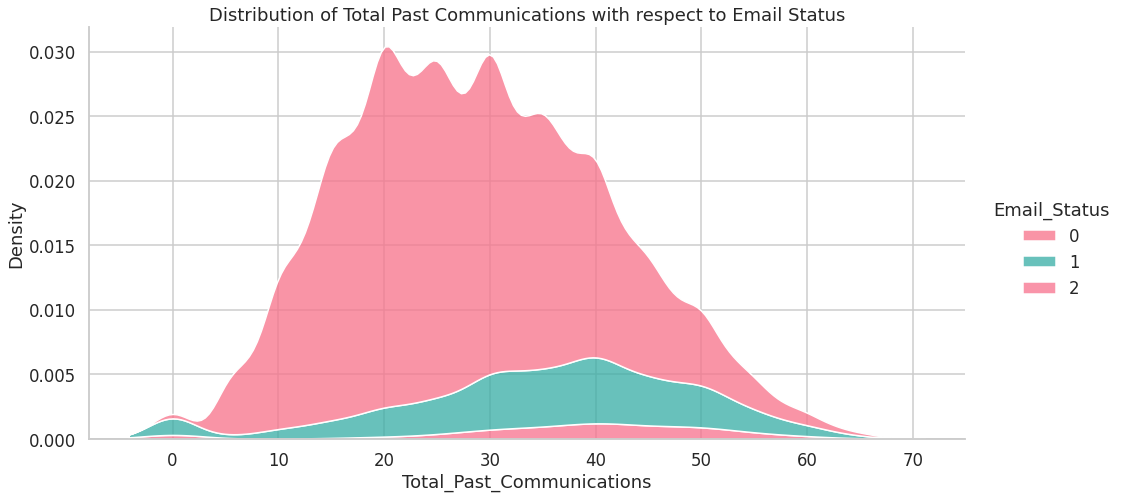

In [50]:
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='husl');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

for comparing the probability density functions of multiple features stacked charts are very useful.

##### 2. What is/are the insight(s) found from the chart?

The density reveals that there is a strong correlation between a high number of ignored emails and a lower frequency of communication, compared to acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Effective communication with customers is crucial, as merely sending marketing emails may not suffice; while the density plot provides distribution information, it may not be sufficient to drive business impact.

### Chart - 8 - Correlation Heatmap

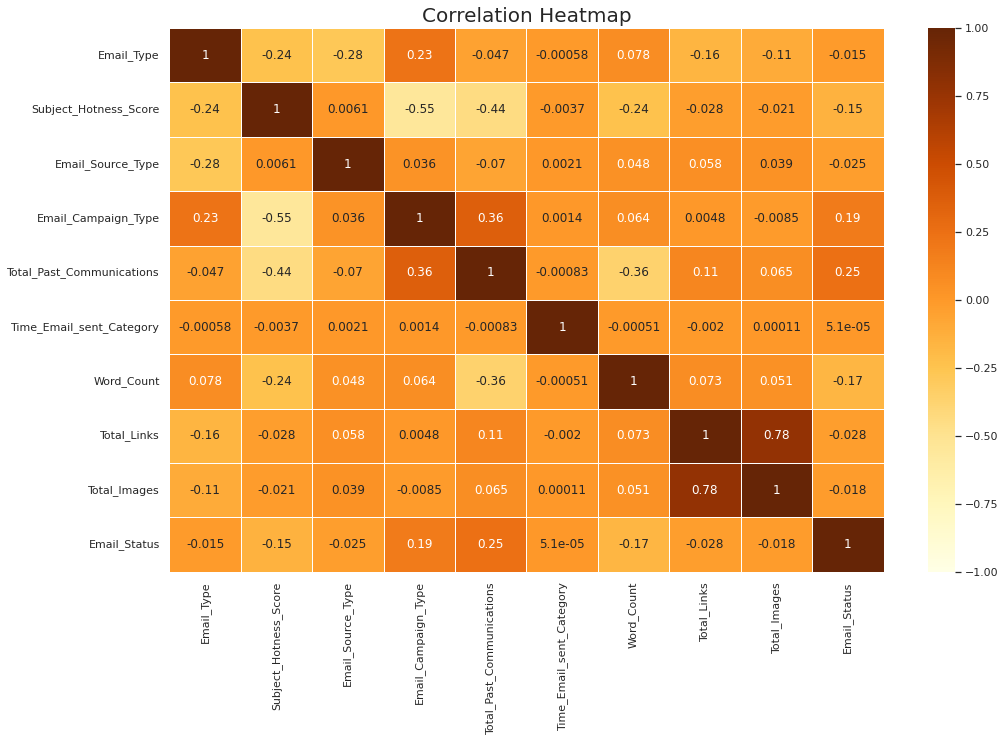

In [51]:
sns.set_context('notebook')
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="YlOrBr", linewidths=.5);
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table that displays correlation coefficients between variables, with values ranging from -1 to 1, and a correlation heatmap is a tool that allows for visualization of the correlations between variables, aiding in data summarization, input for advanced analysis, and diagnostics.

##### 2. What is/are the insight(s) found from the chart?

total links and images shows multicollinearity with correlation of 0.78 

### Chart - 9 - Pair Plot 

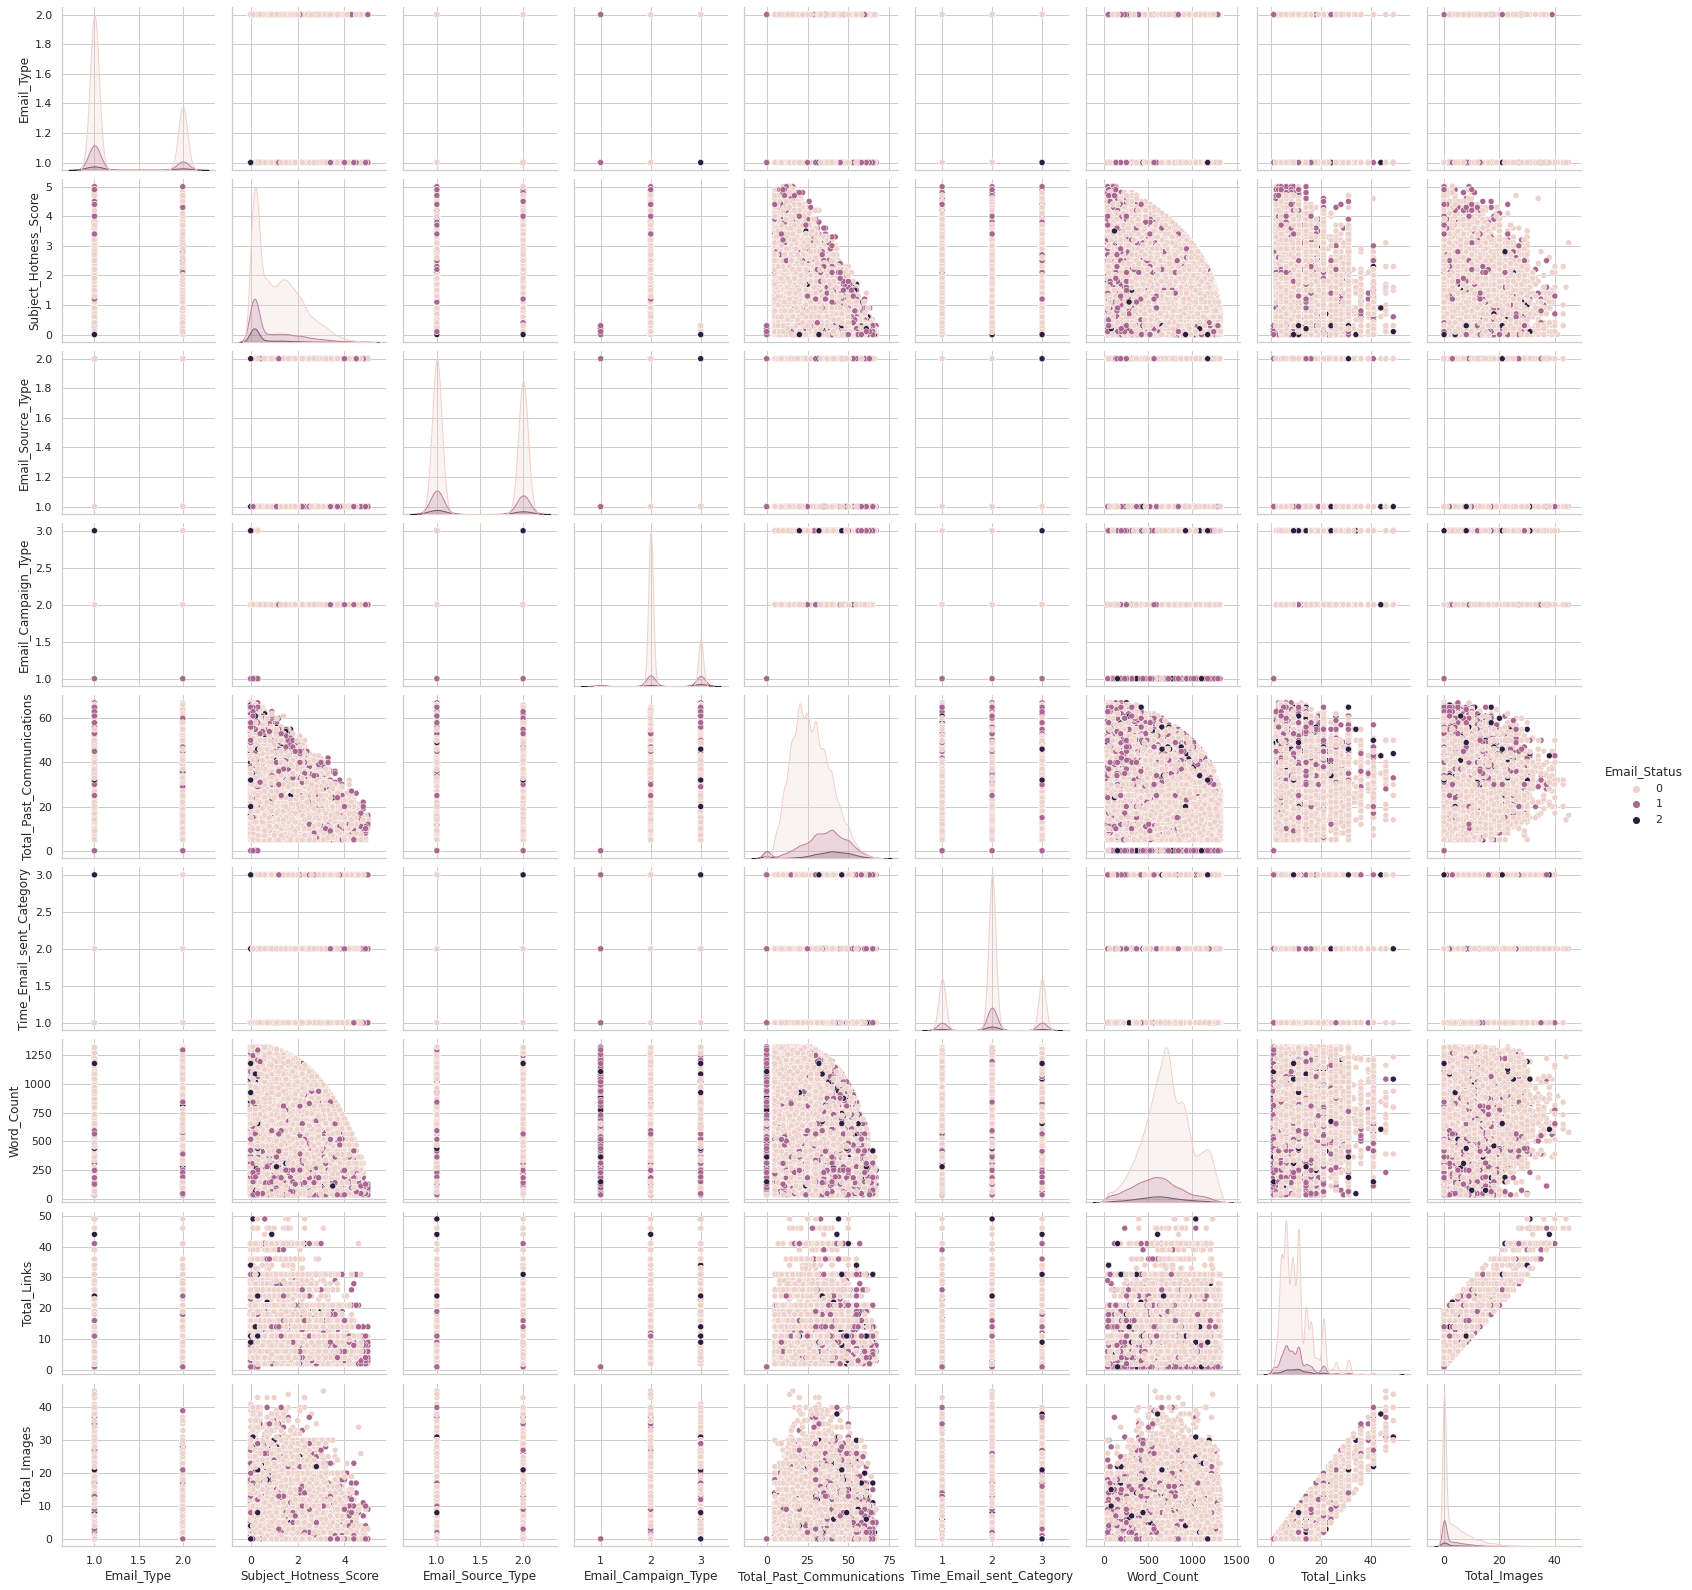

In [ ]:
# Pair Plot visualization
sns.pairplot(df, hue="Email_Status");

##### 1. Why did you pick the specific chart?

A pair plot is a graphical tool used to identify the optimal features to explain a relationship between two variables or form separate clusters and can be used to create simple classification models by drawing lines or making linear separations in the dataset.

Pair plot serves as a visual representation of the correlation matrix, providing insights into data patterns and feature relationships.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the chart suggests that there is minimal linear relationship among the variables, likely due to the categorical nature of the majority of the data; however, a linear relationship between Total Links and Total Images was observed, which was previously noted in the heatmap analysis.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1)Email_Type is not a significant factor in predicting Email_Status.

2)Subject_Hotness_Score does not significantly affect Total_Past_Communications.

3)Customer_Location has no significant impact on the Total_Links and Total_Images in emails.

### Hypothetical Statement - 1
-----
Email_Type is not a significant factor in predicting Email_Status.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis:relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# chi-square test of independence
contingency_table = pd.crosstab(df['Email_Type'], df['Email_Status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    significance = "has a significant"
else:
    significance = "does not have a significant"

print(f"The Email_Type {significance} impact on the Email_Status.")

The Email_Type has a significant impact on the Email_Status.


##### Which statistical test have you done to obtain P-Value?

I used the chi-square test of independence to test the association between Email_Type and Email_Status. 

##### Why did you choose the specific statistical test?

 test suitable for evaluating the association between categorical variables

This test is appropriate for categorical variables

### Hypothetical Statement - 2

---
Subject_Hotness_Score does not significantly affect Total_Past_Communications.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis:no linear relationship between Subject_Hotness_Score and Total_Past_Communications, (H0: ρ = 0)

* Alternative Hypothesis:linear relationship between Subject_Hotness_Score and Total_Past_Communications, (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [52]:
#To perform the test on variable with null or infinity values, create a copy and handle those values.
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [53]:
# Performing Statistical Test to obtain P-Value
# performing correlation test

# Define variables
subject_score = data['Subject_Hotness_Score']
past_communications = data['Total_Past_Communications']

# Perform Pearson's correlation test
corr_coef, p_value = stats.pearsonr(subject_score, past_communications)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("The correlation coefficient is:", corr_coef, "\nReject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("The correlation coefficient is:", corr_coef, "\nFail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

The correlation coefficient is: -0.41932000855776935 
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [54]:
#performing non-parametric Spearman's rank correlation test
# Define variables
subject_score = data['Subject_Hotness_Score']
past_communications = data['Total_Past_Communications']

# Perform Spearman's rank correlation test
corr_coef, p_value = stats.spearmanr(subject_score, past_communications)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("The correlation coefficient is:", corr_coef, "\nReject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("The correlation coefficient is:", corr_coef, "\nFail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


The correlation coefficient is: -0.4096746825982255 
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

I utilized Pearson's correlation analysis to assess the linear relationship between the continuous variables of Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

As the variables are continuous and the aim is to establish a linear association between them, Pearson's correlation test is suitable.

### Hypothetical Statement - 3
---
Customer_Location has no significant impact on the Total_Links and Total_Images in emails.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
# performing ANOVA test

# Create subsets of data based on the Customer_Location column
loc_A = df[df['Customer_Location'] == 'A']['Total_Links']
loc_B = df[df['Customer_Location'] == 'B']['Total_Links']
loc_C = df[df['Customer_Location'] == 'C']['Total_Links']
loc_D = df[df['Customer_Location'] == 'D']['Total_Links']
loc_E = df[df['Customer_Location'] == 'E']['Total_Links']
loc_F = df[df['Customer_Location'] == 'F']['Total_Links']
loc_G = df[df['Customer_Location'] == 'G']['Total_Links']

# Perform ANOVA test
f_value, p_value = stats.f_oneway(loc_A, loc_B, loc_C, loc_D, loc_E, loc_F, loc_G)

#f_value, p_value = stats.f_oneway(*[df.loc[df['Customer_Location'] == location, 'Total_Links'] for location in grouped_data.index])

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# performing Kruskal-Wallis test
# Group data by customer location and extract Total_Links data for each group
# grouped_data = [df.loc[df['Customer_Location'] == location, 'Total_Links'] for location in df['Customer_Location'].unique()]
grouped_data=[df[df['Customer_Location'] == 'A']['Total_Links'], 
              df[df['Customer_Location'] == 'B']['Total_Links'],
              df[df['Customer_Location'] == 'C']['Total_Links'],
              df[df['Customer_Location'] == 'D']['Total_Links'], 
              df[df['Customer_Location'] == 'E']['Total_Links'],
              df[df['Customer_Location'] == 'F']['Total_Links'],
              df[df['Customer_Location'] == 'G']['Total_Links']]
# Perform Kruskal-Wallis test
stat, p_value = stats.kruskal(*grouped_data)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

ANOVA is utilized to establish if there is a significant variance among the averages of two or more sets.(significant difference in the means of two or more groups.)

##### Why did you choose the specific statistical test?

To verify significant dissimilarities amid the average Total_Links among diverse locations (A-G), ANOVA is suitable due to Total_Links being continuous and multiple group means comparison required.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

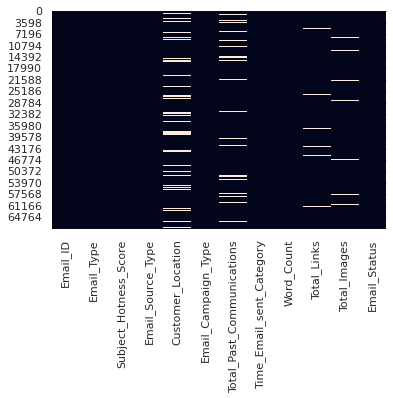

In [ ]:
# Handling Missing Values & Missing Value Imputation

sns.heatmap(df.isnull(), cbar=False);

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

As the customer location is a categorical variable and the missing value cannot be determined, the mode is the optimal method to replace null values.

In [55]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

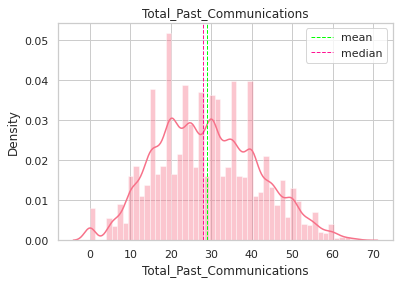

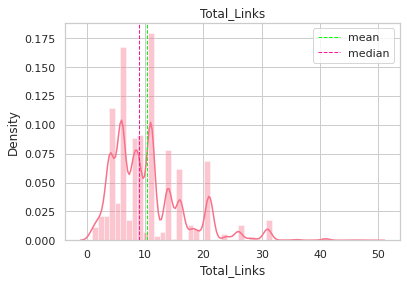

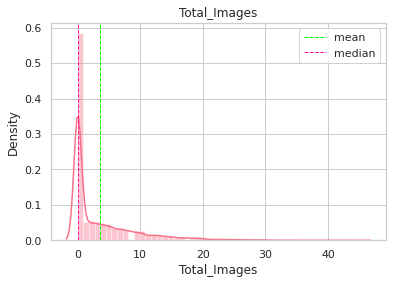

In [56]:
#checking distribution of other null value to find correct way to impute

# Define the colors for mean and median lines
mean_color = '#00ff00' # green
median_color = '#ff1493' # deep pink

# Loop through the categories and plot the histograms
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
    sns.distplot(x=df[cat], hist= True);
    feature = df[cat]
    plt.axvline(feature.mean(), color=mean_color, linestyle='dashed', linewidth=1,label= 'mean');
    plt.axvline(feature.median(), color=median_color, linestyle='dashed', linewidth=1,label='median');
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{cat.title()}');
    plt.xlabel(cat)
    plt.show()
    print('='*100)


Considering the almost normal distribution of only the Total_Past_Communication, mean is preferred; for the other two, with right skewness, median is preferred as it is more resistant to outliers.

In [57]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques use central tendency limit theorem to replace null values, which assumes normality of sampling distribution of mean with large sample sizes. For categorical data like location, mode is the optimal replacement due to the inability to determine the missing value. For continuous data, mean/median is used depending on the distribution and skewness, where median is preferred for right-skewed data.

### 2. Handling Outliers

In [58]:
# Handling Outliers & Outlier treatments
# Importing scipy
import scipy
skewness= [{num_col:scipy.stats.skew(df[num_col])} for num_col in num_feature ]

In [59]:
skewness

[{'Subject_Hotness_Score': 0.8976826167024007},
 {'Total_Past_Communications': 0.22549674958248953},
 {'Total_Links': 1.4267516431080323},
 {'Total_Images': 2.1290649303131772},
 {'Word_Count': 0.012805348013819265}]

**Distribution :**
*  Skewness = 0: Then normally distributed.
*  Skewness < 0: Then more weight in the left tail of the distribution.
*  Skewness > 0: Then more weight in the right tail of the distribution.

In [60]:
# Handling Outliers & Outlier treatments in numerical feature
# separate the symmetric and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

print("Symmetric Distributed Features : -",symmetric_feature)

print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


In [61]:
#upper and lower boundry For Skew Symmetric features.
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')

In [62]:
num_of_outliers=[]
for feature in num_feature:
  num_outliers = df[(df[feature] > outlier_treatment_skew(df, feature)[0]) | (df[feature] < outlier_treatment_skew(df, feature)[1])].shape[0]
  num_of_outliers.append({feature:num_outliers})
  print(num_of_outliers)

[{'Subject_Hotness_Score': 247}]
[{'Subject_Hotness_Score': 247}, {'Total_Past_Communications': 136}]
[{'Subject_Hotness_Score': 247}, {'Total_Past_Communications': 136}, {'Total_Links': 1608}]
[{'Subject_Hotness_Score': 247}, {'Total_Past_Communications': 136}, {'Total_Links': 1608}, {'Total_Images': 5585}]
[{'Subject_Hotness_Score': 247}, {'Total_Past_Communications': 136}, {'Total_Links': 1608}, {'Total_Images': 5585}, {'Word_Count': 0}]


In [63]:
num_of_outliers

[{'Subject_Hotness_Score': 247},
 {'Total_Past_Communications': 136},
 {'Total_Links': 1608},
 {'Total_Images': 5585},
 {'Word_Count': 0}]

In [64]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

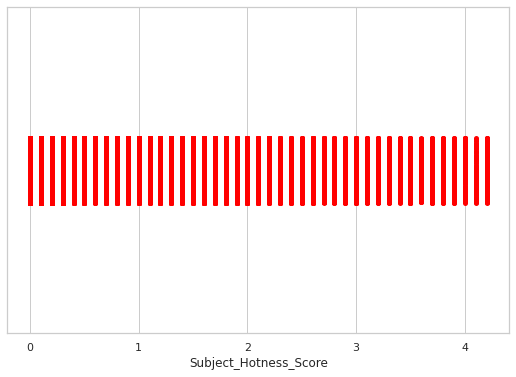

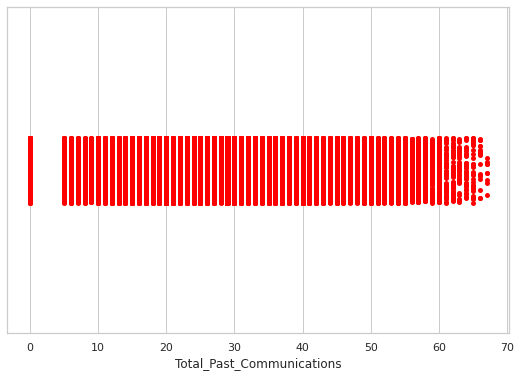

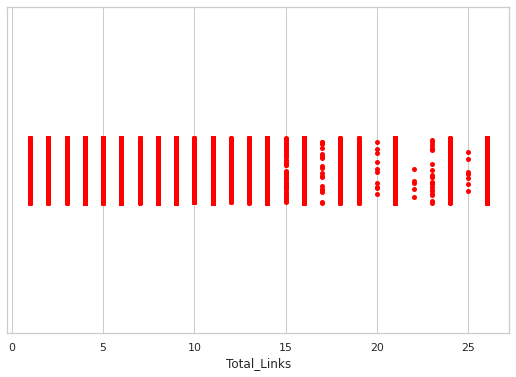

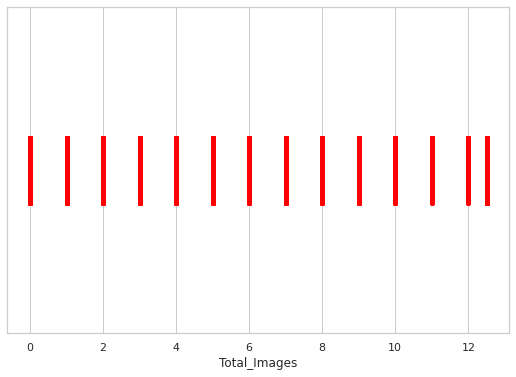

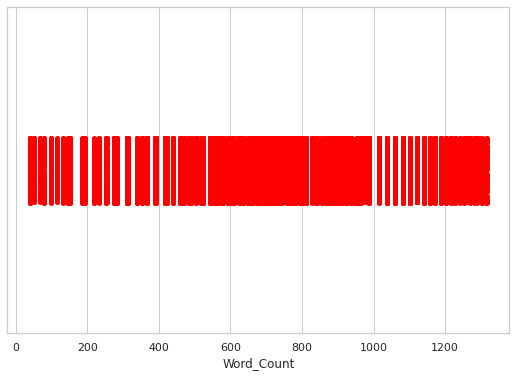

In [65]:
# dataset distribution using strip plot after outlier treatment
#for the numerical columns 

for col in num_feature:
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.stripplot(x=df[col], color='red', size=5, ax=ax)
    ax.set_xlabel(col)
    plt.show()
    print('='*120)


##### What all outlier treatment techniques have you used and why did you use those techniques?

To remove outliers from numerical values, I used capping technique for non-symmetric data by setting the upper and lower limit values to the maximum and minimum value instead of eliminating them.

there is no symmetric data.

### 3. Categorical Encoding

In [66]:
# Encoding your categorical columns
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']


df2=pd.get_dummies(df, columns=cat_col, drop_first=True).reset_index().drop(columns=["index"])
df2.head()

,Email_ID,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Links,Total_Images,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,EMA00081000034500,2.20,33.00,440.00,8.00,0.00,0,0,1,1,0,0,0,0,0,0,1,0,0
1,EMA00081000045360,2.10,15.00,504.00,5.00,0.00,0,1,0,1,0,1,0,0,0,0,0,0,1
2,EMA00081000066290,0.10,36.00,962.00,5.00,0.00,1,1,0,0,1,1,0,1,0,0,0,0,0
3,EMA00081000076560,3.00,25.00,610.00,16.00,0.00,0,0,1,1,0,1,0,0,0,0,1,0,0
4,EMA00081000109720,0.00,18.00,947.00,4.00,0.00,0,0,1,0,1,1,0,0,1,0,0,0,0


In [67]:
df2.shape

(68353, 19)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used OneHotEncoding.
OneHotEncoding transforms categorical variables into a format that can be utilized by ML algorithms to improve their predictive performance.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [68]:
# Manipulating Features to minimize feature correlation and create new features
df2.drop(columns = ['Email_ID'], inplace = True)

We can merge 'Total_Links' and 'Total_Images' to form a new feature and remove the individual features due to their high correlation.

In [69]:
# Total Number of Images and link
df2['Images_plus_link'] = df2['Total_Images'] + df2['Total_Links']

In [70]:
# Number of Images per link
df2['Images_per_link'] = df2['Total_Images'] / df2['Total_Links']

In [ ]:
#combining total image and total link to find its percentage in total word count

df2['Percentage_of_words_that_are_links_image'] = ((df2['Total_Links']+ df2['Total_Images'])/ dff['Word_Count'])*100

In [71]:
#dropping total link and image 
df2.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [72]:
#replacing infinity values with 0
np.isinf(df2).values.sum()
df2.replace([np.inf, -np.inf], 0, inplace=True)

In [73]:
df2.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Images_plus_link,Images_per_link
0,2.20,33.00,440.00,0,0,1,1,0,0,0,0,0,0,1,0,0,8.00,0.00


#### 2. Feature Selection

In [74]:
# Select your features wisely to avoid overfitting
df2.shape

(68353, 18)

#####Feature selection by removing columns from a dataset that have a low variance

 Constant and quasi-constant features are those features that have very low or zero variance across the dataset. Such features do not contribute much to the prediction model as they do not provide any useful information.

In [75]:
# Constant and Quasi Constant Feature need to be dropped
from sklearn.feature_selection import VarianceThreshold

def dropping_constant(data):
    selector = VarianceThreshold(threshold=0.05)
    selector.fit(data)
    constant_columns = data.columns[~selector.get_support()].tolist()
    
    if "Email_Status" in constant_columns:
        constant_columns.remove("Email_Status")
        
    print(f"Columns dropped: {constant_columns}")
    return data.drop(constant_columns, axis=1)


# def dropping_constant(data):
  # from  sklearn.feature_selection import VarianceThreshold
  # var_thres= VarianceThreshold(threshold=0.05)
  # var_thres.fit(data)
  # concol = [column for column in data.columns 
          # if column not in data.columns[var_thres.get_support()]] 
          #var_thres.get_support() return boolean values on checking condition

In [76]:
# Calling the function
df_removed_var=dropping_constant(df2)

Columns dropped: []


In [ ]:
#correlation matrix
corr = df_removed_var.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt"), 
                        ("color", "black"), 
                        ("font-family", "Helvetica")]),
            dict(selector="td",
                 props=[('padding', "0.2em 0.5em"), 
                        ("color", "black"), 
                        ("font-family", "Helvetica")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt"), 
                        ("color", "blue"), 
                        ("text-decoration", "underline"), 
                        ("cursor", "pointer")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'), 
                        ('font-size', '12pt'), 
                        ('background-color', 'lightgray')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 
                       'font-size': '10pt', 
                       'font-weight': 'bold', 
                       'font-family': 'Helvetica'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G,Images_plus_link,Images_per_link
Subject_Hotness_Score,1.00,-0.42,-0.24,-0.15,-0.24,0.01,0.61,-0.60,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.03,-0.01
Total_Past_Communications,-0.42,1.00,-0.35,0.23,-0.04,-0.07,-0.25,0.30,0.01,-0.00,-0.00,-0.00,-0.01,0.01,-0.00,0.00,0.10,0.06
Word_Count,-0.24,-0.35,1.00,-0.17,0.08,0.05,-0.06,0.06,0.01,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.07,0.03
Email_Status,-0.15,0.23,-0.17,1.00,-0.02,-0.02,-0.28,0.24,0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.02,-0.00
Email_Type_2,-0.24,-0.04,0.08,-0.02,1.00,-0.28,-0.27,0.26,0.01,-0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00,-0.15,-0.08
Email_Source_Type_2,0.01,-0.07,0.05,-0.02,-0.28,1.00,-0.04,0.04,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.00,0.05,0.02
Email_Campaign_Type_2,0.61,-0.25,-0.06,-0.28,-0.27,-0.04,1.00,-0.97,-0.01,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.06,0.03
Email_Campaign_Type_3,-0.60,0.30,0.06,0.24,0.26,0.04,-0.97,1.00,0.01,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.03,-0.01
Time_Email_sent_Category_2,-0.01,0.01,0.01,0.00,0.01,0.00,-0.01,0.01,1.00,-0.61,0.00,-0.00,-0.01,0.01,0.00,0.00,-0.00,0.00
Time_Email_sent_Category_3,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.61,1.00,-0.01,-0.00,0.01,-0.00,0.00,-0.00,0.00,0.00


#####Multicolinearity

In [101]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [102]:
# Checking Variable Inflation Factor # the independent variables set
X = df_removed_var.copy()

# create a list to hold the VIF values
vif_values = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# create a DataFrame to hold the feature names and VIF values
vif_data = pd.DataFrame({'feature': X.columns, 'VIF': vif_values})

# round the VIF values to 2 decimal places
vif_data['VIF'] = vif_data['VIF'].round(2)

# filter for features with VIF values greater than or equal to 8 and print the feature names
high_vif_features = vif_data[vif_data['VIF'] >= 8]['feature'].values
for feature in high_vif_features:
    print(feature)

Total_Past_Communications
Word_Count
Email_Campaign_Type_2
Email_Campaign_Type_3
Customer_Location_G


In [107]:
#function for Checking Feature Correlation and finding multicolinearity
def correlation(df, threshold):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = upper_triangle.stack()[upper_triangle.stack() > threshold].index.tolist()
    col_corr = [col[1] for col in col_corr]
    return col_corr

In [108]:
correlation(df_removed_var,0.6)

['Email_Campaign_Type_2',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_3',
 'Images_per_link']

In [119]:
#dropping highly correlated values
df_new=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G'],axis=1)
df_new.shape

(68353, 16)

In [120]:
df_new.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Type_2,Email_Source_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Images_plus_link,Images_per_link
0,2.20,33.00,440.00,0,0,1,0,0,0,0,0,0,1,0,8.00,0.00
1,2.10,15.00,504.00,0,1,0,0,1,0,0,0,0,0,0,5.00,0.00
2,0.10,36.00,962.00,1,1,0,1,1,0,1,0,0,0,0,5.00,0.00
3,3.00,25.00,610.00,0,0,1,0,1,0,0,0,0,1,0,16.00,0.00
4,0.00,18.00,947.00,0,0,1,1,1,0,0,1,0,0,0,4.00,0.00


In [121]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_new.copy()

# VIF dataframe
vif = pd.DataFrame()
# vif["feature"] = X.columns
vif = pd.DataFrame({"feature": X.columns})

# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2)) #vif = vif.round(2)

vif[vif["VIF"] >= 8]["feature"].apply(print)
# for feature in vif[vif["VIF"] >= 8]["feature"]:
    # print(feature)

Series([], Name: feature, dtype: object)

In [122]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Email_Status']]])

,variables,VIF
0,Subject_Hotness_Score,2.57
1,Total_Past_Communications,5.09
2,Word_Count,5.25
3,Email_Type_2,1.63
4,Email_Source_Type_2,1.97
5,Email_Campaign_Type_3,2.20
6,Time_Email_sent_Category_2,3.73
7,Time_Email_sent_Category_3,1.90
8,Customer_Location_B,1.12
9,Customer_Location_C,1.15


##### What all feature selection methods have you used  and why?

In feature selection, there are various methods to identify the most relevant features for model building. One such method is the VIF method, which involves the removal of features with high variance inflation factors (VIFs).

The VIF method involves three steps. First, the VIF factors are calculated for each feature. Second, the VIF factors for each predictor variable are inspected, and if the VIF is between 5-10, multicollinearity is likely present and the variable is considered for dropping. Finally, the VIFs are validated again for each feature to identify the final set of features to be used for model building.

To identify the most relevant features using the VIF method, I followed three steps. First, I dropped columns having constant or quasi-constant variance. Second, I used Pearson correlation to identify columns having multicollinearity and dropped them. Third, I validated the VIFs for each feature and found some features having a VIF of more than 5-10. I considered the threshold to be 8 and again manipulated some features and dropped multicollinear columns to make the VIF less than 8. This resulted in the final set of features to be used for model building. 

##### Which all features you found important and why?

In [123]:
#important features
df_new.columns.to_list()

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Email_Type_2',
 'Email_Source_Type_2',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Images_plus_link',
 'Images_per_link']

In [124]:
#defining fun- Embedded Method of validating the feature importances of selected features

from sklearn.ensemble import RandomForestClassifier

def randomforest_embedded(x, y):
    # create a random forest classifier with hyperparameters
    model = RandomForestClassifier(n_estimators=550)
    # fit the model
    model.fit(x, y)
    # get the feature importances
    importances = model.feature_importances_
    # create a DataFrame to store the feature importances
    feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
    # sort the features by importance in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    return feature_importances


In [134]:
# Getting feature importance of selected features
randomforest_embedded(x=df_new.drop(["Email_Status"],axis=1),y=df_new["Email_Status"])

,Feature,Importance
2,Word_Count,0.29
1,Total_Past_Communications,0.23
6,Images_plus_link,0.17
0,Subject_Hotness_Score,0.15
7,Images_per_link,0.09
4,Email_Campaign_Type_3,0.03
5,Time_Email_sent_Category_2,0.02
3,Email_Source_Type_2,0.02


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [135]:
# Transforming data and Getting symmetric and skew symmetric features from the columns

# Define empty lists for storing symmetric and non-symmetric features
symmetric_features = []
non_symmetric_features = []

# Loop through each column in the dataframe
for col in df_new.columns:
    # Calculate the difference between the mean and median
    diff = abs(df_new[col].mean() - df_new[col].median())
    
    # If the difference is less than 0.1, add the column to the symmetric features list
    if diff < 0.1:
        symmetric_features.append(col)
    # Otherwise, add the column to the non-symmetric features list
    else:
        non_symmetric_features.append(col)

# Print the lists of symmetric and non-symmetric features
print("Symmetric Distributed Features : -",symmetric_features)
print("Skew Symmetric Distributed Features : -",non_symmetric_features)


Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Word_Count', 'Email_Status', 'Email_Source_Type_2', 'Email_Campaign_Type_3', 'Time_Email_sent_Category_2', 'Images_plus_link', 'Images_per_link']


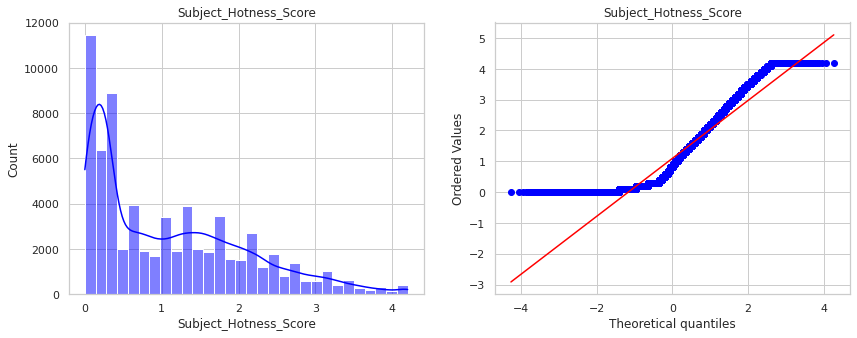

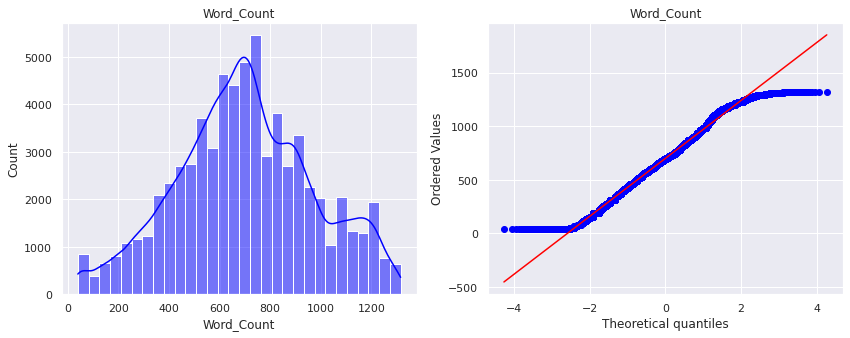

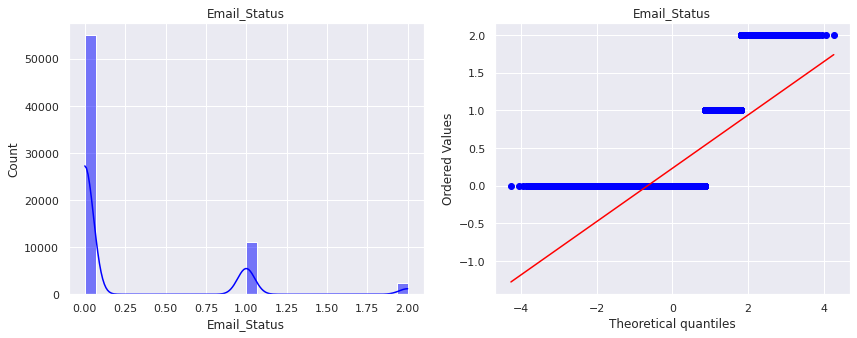

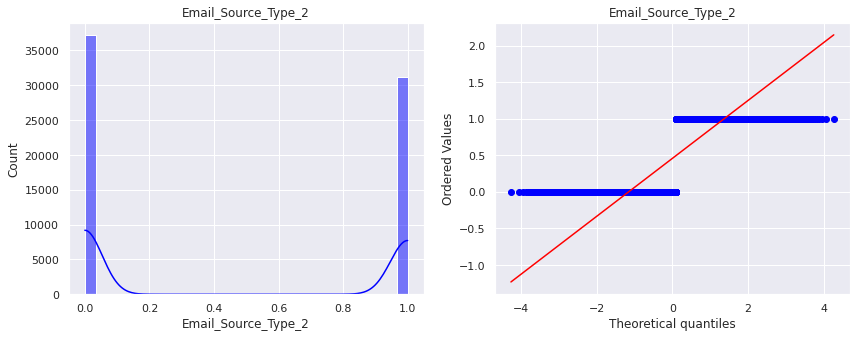

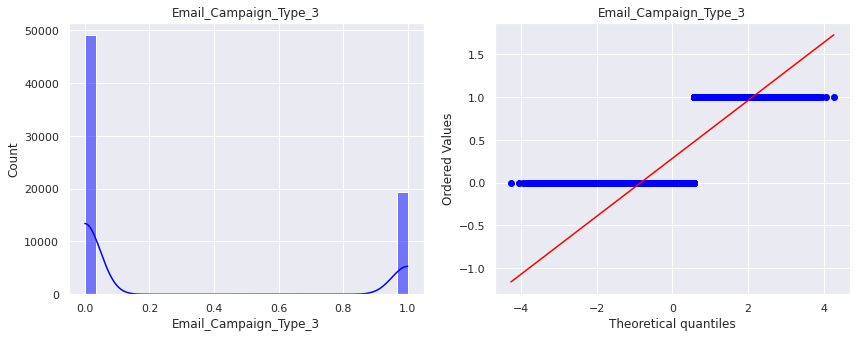

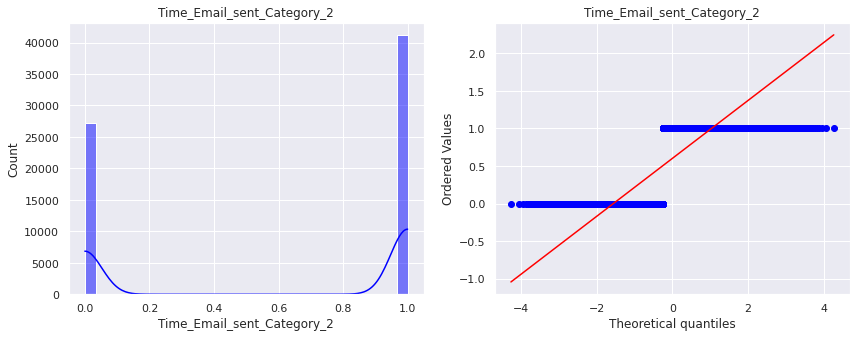

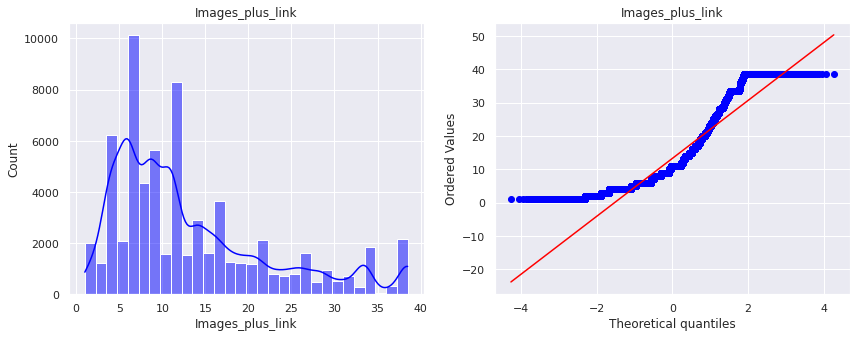

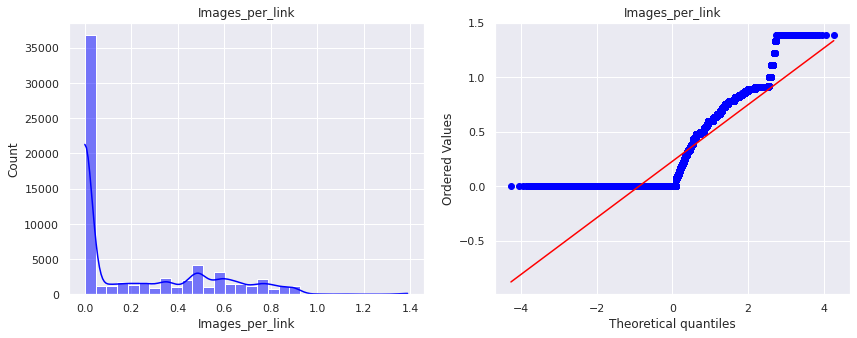

In [138]:
!pip install seaborn matplotlib

#vizualization 
from scipy.stats import *
from scipy import stats

for variable in non_symmetric_features:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  sns.histplot(data=df_new, x=variable, bins=30, kde=True, color='blue')
  plt.title(variable)
  
  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_new[variable], dist='norm',plot=plt)
  plt.title(variable)
  sns.set_style('darkgrid')
  sns.color_palette("viridis")
  plt.show()
  print('='*120)

In [139]:
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count']:
  df_new[col]=np.sqrt(df_new[col])

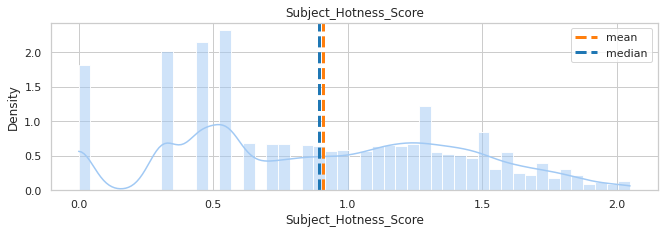

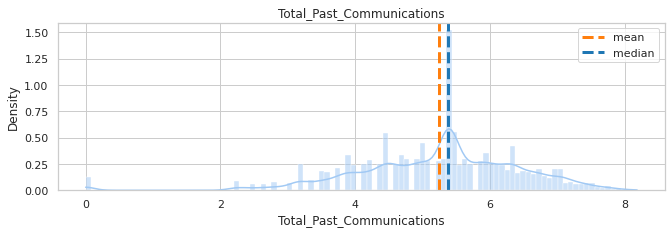

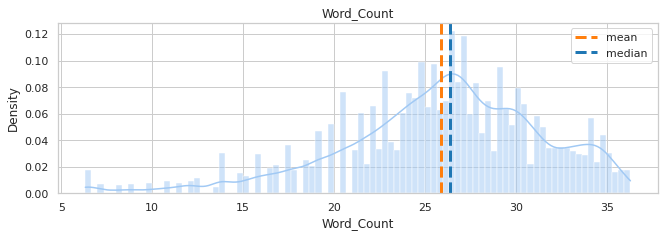

In [141]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

for i,col in enumerate(['Subject_Hotness_Score','Total_Past_Communications','Word_Count']):
    plt.figure(figsize = (18,18))
    plt.subplot(6,2,i+1)
    sns.histplot(df_new[col], kde=True, stat='density')
    feature = df_new[col]
    plt.axvline(feature.mean(), color='#ff7f0e', linestyle='dashed', linewidth=3, label='mean')
    plt.axvline(feature.median(), color='#1f77b4', linestyle='dashed', linewidth=3, label='median')
    plt.title(f'{col.title()}')
    plt.legend(loc='best')
    plt.tight_layout()


Some of the features were categorical and didn't require transformation, while I applied square root transformation to three features to convert them into a Gaussian normal distribution.

### 6. Data Scaling

In [142]:
df_new.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Email_Source_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_2,Images_plus_link,Images_per_link
0,1.48,5.74,20.98,0,1,0,0,8.00,0.00
1,1.45,3.87,22.45,0,0,0,1,5.00,0.00
2,0.32,6.00,31.02,1,0,1,1,5.00,0.00
3,1.73,5.00,24.70,0,1,0,1,16.00,0.00
4,0.00,4.24,30.77,0,1,1,1,4.00,0.00


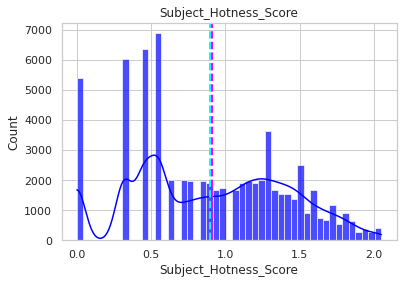

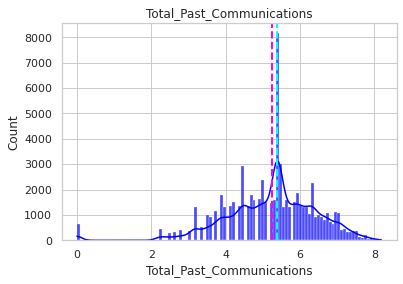

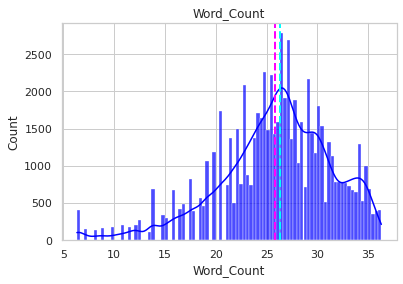

ValueError: ignored

In [143]:
# Visualizing data distribution using histogram for each feature
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Percentage_of_words_that_are_links_image']:
  sns.histplot(data=df_new, x=col, kde=True, color='blue', alpha=0.7)
  plt.axvline(df_new[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df_new[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col)
  plt.show()

In [ ]:
#standard scaler
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count',
            'Percentage_of_words_that_are_links_image']:
  df_new[col] = StandardScaler().fit_transform(df_new[col].values.reshape(-1, 1))

In [ ]:
df_new.head()

,Email_Type,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Email_Campaign_Type_3,Percentage_of_words_that_are_links_image,Images_per_link,Images_plus_link
0,1,1.11,0.41,-0.87,0,0,0,0,0,0,1,0,0,-0.18,8.00,0.00
1,2,1.04,-1.12,-0.61,0,1,0,0,0,0,0,0,0,-0.41,5.00,0.00
2,2,-1.14,0.62,0.92,1,1,0,1,0,0,0,0,1,-0.54,5.00,0.00
3,1,1.59,-0.20,-0.21,0,1,0,0,0,0,1,0,0,0.04,16.00,0.00
4,1,-1.75,-0.82,0.88,0,1,0,0,1,0,0,0,1,-0.57,4.00,0.00


##### Which method have you used to scale you data and why?



When we are using an algorithm that assumes your features have a similar range, we should use feature scaling.

Since all of them has almost normal distribution, hence applied standard scaler to scale the features.

When using algorithms that assume that feature ranges are similar, feature scaling should be used.

Feature scaling is not always necessary when feature ranges are not too different, for instance, when one range is between 0 and 2 and another range is between -1 and 0.5.

Standardization is recommended for feature scaling when the data follows a Gaussian distribution, whereas normalization is more suitable for non-Gaussian distributed data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

This dataset doesnot need any dimensionality reduction.

Dimensionality reduction is a technique that is used to reduce the number of features in a dataset. It is often used when the number of features is very large, as this can lead to problems such as overfitting and slow computation. There are a variety of techniques that can be used for dimensionality reduction, such as principal component analysis (PCA) and singular value decomposition (SVD).

There are several reasons why dimensionality reduction might be useful. One reason is that it can help to reduce the size of a dataset, which can be particularly useful when the dataset is very large. It can also help to improve the performance of machine learning models by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another reason to use dimensionality reduction is to reduce the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the volume of the space increases exponentially. This can lead to problems such as the nearest neighbor search becoming less effective, as the distances between points become much larger. Dimensionality reduction can help to reduce the curse of dimensionality by reducing the number of dimensions in the data.

Finally, dimensionality reduction can also be useful for visualizing high-dimensional data. It can be difficult to visualize data in more than three dimensions, so reducing the number of dimensions can make it easier to understand the patterns in the data.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not Applicable

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_removed.drop("Email_Status",axis=1),df_removed["Email_Status"], 
    test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 15)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


##### What data splitting ratio have you used and why? 

In this case I have used 80:20 split as splitting in any ratio 80/20 or 70/30 deosnot affect unless there is less values in dataset. However, there are two competing concerns: with less training data, parameter estimates have greater variance. With less testing data, performance statistic will have greater variance. it is best to divide data such that neither the variance in the training set nor the variance in the test set is too high.

Example : If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

### 9. Handling Imbalanced Dataset

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

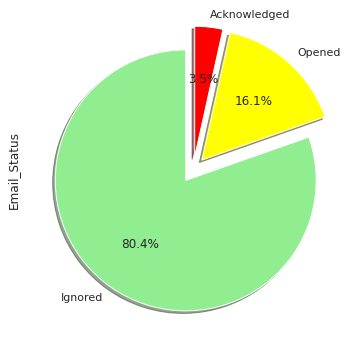

In [ ]:
# Dependant Variable Column Visualization
df['Email_Status'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Ignored','Opened','Acknowledged'],
                               colors=['lightgreen','yellow','red'],
                               explode=[0.1,0.1,0.1]
                              );

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 80:16:4. So, during model creating it's obvious that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
#SMOTE
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 15)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 15)
Number transactions y_test dataset:  (13671,)


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


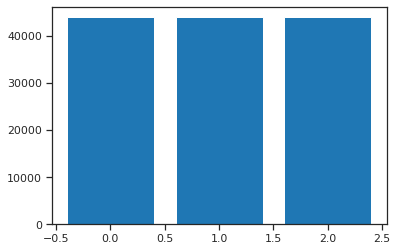

In [ ]:
#visualization of resampled data
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  per = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 80:16:4 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***